In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append("../human_3d_pose_baseline/")
from utils import camera_utils, data_utils, vis_utils

## Load Human3.6M camera parameters

In [3]:
cams = camera_utils.load_cameras("../dataset/h36m/cameras.h5")

## Generate 2d poses from Human3.6M 3d poses

In [4]:
actions = ["Sitting",]  # actions to load.

train_set, test_set, data_mean, data_std, dim_to_ignore, dim_to_use = \
    data_utils.create_2d_data(actions, "../dataset/h36m/", cams)

In [5]:
train_set

{(1,
  'Sitting',
  'Sitting 1.54138969.h5'): array([[-1.78005441, -0.68216225, -1.34117159, ..., -0.28893505,
         -1.11101915,  0.28600438],
        [-1.78082797, -0.68150896, -1.34153378, ..., -0.27934079,
         -1.08352318,  0.32313631],
        [-1.7814926 , -0.68041954, -1.34188814, ..., -0.27008386,
         -1.05292886,  0.35927284],
        ...,
        [-1.1303134 ,  1.18729798, -0.70708684, ...,  0.96955482,
         -0.81270456,  0.92874116],
        [-1.13116591,  1.18373652, -0.70811397, ...,  0.9700596 ,
         -0.82602019,  0.89714747],
        [-1.13152686,  1.17974519, -0.70867144, ...,  0.97204665,
         -0.83557853,  0.86894699]]),
 (1,
  'Sitting',
  'Sitting 1.55011271.h5'): array([[-0.07564788, -1.11050133, -0.52279428, ..., -0.73494101,
         -0.7518812 ,  0.17674086],
        [-0.07470618, -1.10978267, -0.52163192, ..., -0.72823572,
         -0.7540454 ,  0.20535658],
        [-0.07430545, -1.10835665, -0.52108582, ..., -0.72219974,
         -0.7

## Extract a seqence from the training sequences

In [6]:
def get_sequences(poses_set, seq_idx):
    n_cams = 4  # number of cameras per sequence.
    
    sequences = []
    for cam_idx in range(n_cams):
        pose_seq = list(poses_set.values())[seq_idx * n_cams + cam_idx]
        sequences.append(pose_seq)
        
    return sequences

In [7]:
seq_idx = 0
pose_seqs_normalized = get_sequences(train_set, seq_idx)  # 4 pose sets from 4 cameras of the same sequence

## Un-normalize poses

In [8]:
pose_seqs = []

for pose_seq in pose_seqs_normalized:
    pose_seq = data_utils.unnormalize_data(pose_seq, data_mean, data_std, dim_to_ignore)
    pose_seqs.append(pose_seq)

## Plot a 2d pose in the sequence!

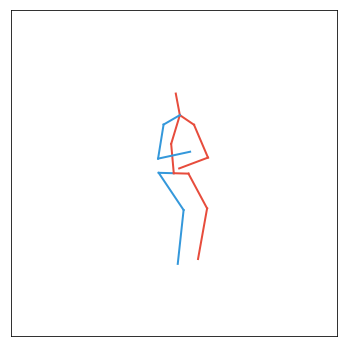

In [9]:
frame_idx = 300

cam_idx = 3
assert cam_idx >= 0 and cam_idx <= 4

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
vis_utils.show_2d_pose(pose_seqs[cam_idx][frame_idx], ax)

## Plot 2d poses projected to the 4 cameras!

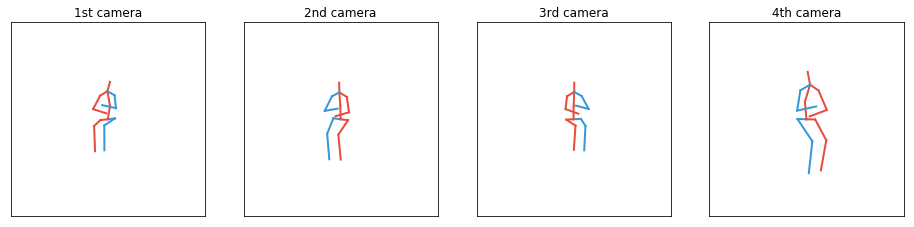

In [10]:
frame_idx = 300

fig = plt.figure(figsize=(16, 8))

# 1st camera
ax = fig.add_subplot("141")
vis_utils.show_2d_pose(pose_seqs[0][frame_idx], ax)
ax.set_title("1st camera")

# 2nd camera
ax = fig.add_subplot("142")
vis_utils.show_2d_pose(pose_seqs[1][frame_idx], ax)
ax.set_title("2nd camera")

# 3rd camera
ax = fig.add_subplot("143")
vis_utils.show_2d_pose(pose_seqs[2][frame_idx], ax)
ax.set_title("3rd camera")

# 4th camera
ax = fig.add_subplot("144")
vis_utils.show_2d_pose(pose_seqs[3][frame_idx], ax)
ax.set_title("4th camera");